In [45]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [46]:
df=pd.read_csv("C:/Users/shahkumar/Downloads/social_media_engagement_10000_rows_with_hashtags.csv")
df.head()

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score,hashtags
0,1,Facebook,image,8/17/2023 14:45,2121,474,628,Thursday,positive,Yes
1,2,Facebook,carousel,5/14/2023 0:45,3660,432,694,Sunday,neutral,No
2,3,Instagram,poll,2/21/2023 16:15,4955,408,688,Tuesday,negative,No
3,4,Twitter,image,11/16/2023 0:45,1183,90,187,Thursday,negative,Yes
4,5,Twitter,video,5/23/2023 0:30,3499,247,286,Tuesday,positive,Yes


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   post_id          10000 non-null  int64 
 1   platform         10000 non-null  object
 2   post_type        10000 non-null  object
 3   post_time        10000 non-null  object
 4   likes            10000 non-null  int64 
 5   comments         10000 non-null  int64 
 6   shares           10000 non-null  int64 
 7   post_day         10000 non-null  object
 8   sentiment_score  10000 non-null  object
 9   hashtags         10000 non-null  object
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [48]:
df[df['post_id'].duplicated()]
df["total_engagement"] = df["likes"] + df["comments"] + df["shares"]

Text(0.5, 1.0, 'Total_Engagement by Platform')

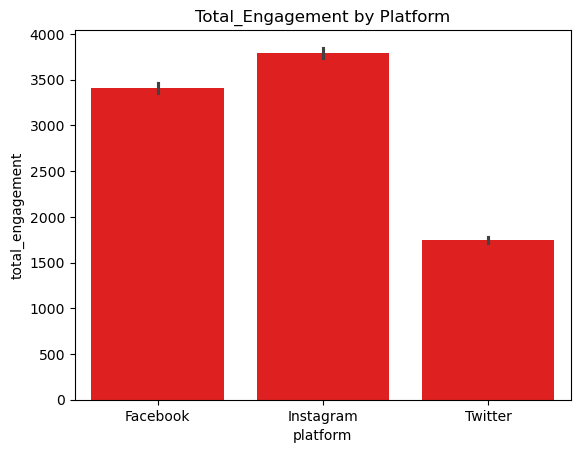

In [49]:
sns.barplot(x="platform",y="total_engagement",data=df,color="red")
plt.title("Total_Engagement by Platform")

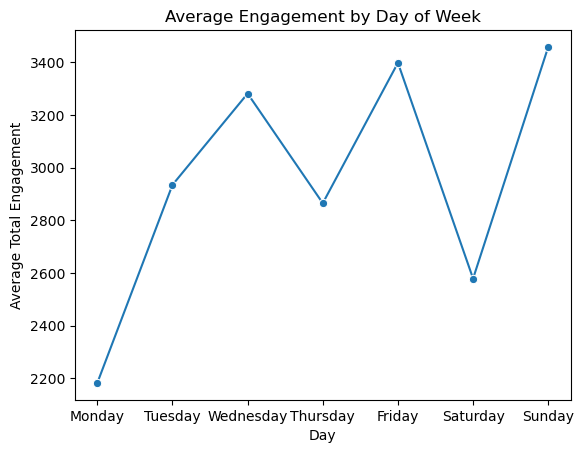

In [53]:
day_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

daily_engagement = (df.groupby("post_day")["total_engagement"].mean().reindex(day_order).reset_index())
sns.lineplot(
    x="post_day",
    y="total_engagement",
    data=daily_engagement,
    marker="o")
plt.title("Average Engagement by Day of Week")
plt.xlabel("Day")
plt.ylabel("Average Total Engagement")
plt.show()


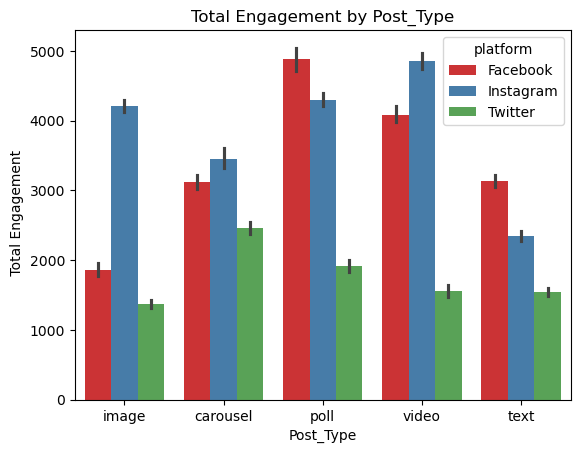

In [61]:
sns.barplot(x="post_type",y="total_engagement",hue="platform",data=df,palette="Set1")
plt.title("Total Engagement by Post_Type")
plt.xlabel("Post_Type")
plt.ylabel(" Total Engagement")
plt.show()


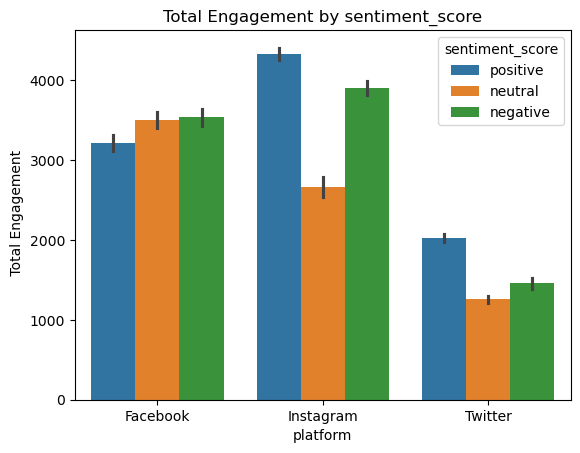

In [59]:
sns.barplot(x="platform",y="total_engagement",hue="sentiment_score",data=df)
plt.title("Total Engagement by sentiment_score")
plt.xlabel("platform")
plt.ylabel(" Total Engagement")
plt.show()


In [4]:
#Feature encoding
df["post_time"]=pd.to_datetime(df["post_time"])
df['post_day'] = df['post_time'].dt.day_name()


In [5]:
#df['hashtags'] = df['hashtags'].map({'Yes': 1, 'No': 0})
df['hour'] = df['post_time'].dt.hour
df['day_of_week'] = df['post_time'].dt.dayofweek
#df['post_day'] = df['post_time'].dt.day_name()


In [6]:
df["sentiment_score"].value_counts()

sentiment_score
positive    4573
neutral     2740
negative    2687
Name: count, dtype: int64

In [7]:
sentiment={"positive":0,
           "neutral":1,
           "negative":2}
df["sentiment_score"]=df["sentiment_score"].map(sentiment)

In [8]:
df["post_day"].value_counts()

post_day
Wednesday    1786
Thursday     1596
Friday       1562
Tuesday      1507
Sunday       1394
Monday       1091
Saturday     1064
Name: count, dtype: int64

In [44]:
days={"Monday":1,"Tuesday":2,"Wednesday":3,"Thursday":4,"Friday":5,"Saturday":6,"Sunday":7}
df["post_day"]=df["post_day"].map(days)
df.head()

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score,hashtags,total_engagement
0,1,Facebook,image,8/17/2023 14:45,2121,474,628,4,positive,Yes,3223
1,2,Facebook,carousel,5/14/2023 0:45,3660,432,694,7,neutral,No,4786
2,3,Instagram,poll,2/21/2023 16:15,4955,408,688,2,negative,No,6051
3,4,Twitter,image,11/16/2023 0:45,1183,90,187,4,negative,Yes,1460
4,5,Twitter,video,5/23/2023 0:30,3499,247,286,2,positive,Yes,4032


In [10]:
df["hashtags"].value_counts()
df['hashtags'] = (df['hashtags'].astype(str).str.strip().str.lower())
df['hashtags'] = df['hashtags'].map({'yes': 1, 'no': 0})

In [11]:
df.head()

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score,hashtags,hour,day_of_week
0,1,Facebook,image,2023-08-17 14:45:00,2121,474,628,4,0,1,14,3
1,2,Facebook,carousel,2023-05-14 00:45:00,3660,432,694,7,1,0,0,6
2,3,Instagram,poll,2023-02-21 16:15:00,4955,408,688,2,2,0,16,1
3,4,Twitter,image,2023-11-16 00:45:00,1183,90,187,4,2,1,0,3
4,5,Twitter,video,2023-05-23 00:30:00,3499,247,286,2,0,1,0,1


In [12]:
#ONE HOT ENCODING 
cat_cols = ['platform', 'post_type']
df= pd.get_dummies(df,columns=cat_cols,drop_first=True)


In [13]:
df.head()

,post_id,post_time,likes,comments,shares,post_day,sentiment_score,hashtags,hour,day_of_week,platform_Instagram,platform_Twitter,post_type_image,post_type_poll,post_type_text,post_type_video
0,1,2023-08-17 14:45:00,2121,474,628,4,0,1,14,3,False,False,True,False,False,False
1,2,2023-05-14 00:45:00,3660,432,694,7,1,0,0,6,False,False,False,False,False,False
2,3,2023-02-21 16:15:00,4955,408,688,2,2,0,16,1,True,False,False,True,False,False
3,4,2023-11-16 00:45:00,1183,90,187,4,2,1,0,3,False,True,True,False,False,False
4,5,2023-05-23 00:30:00,3499,247,286,2,0,1,0,1,False,True,False,False,False,True


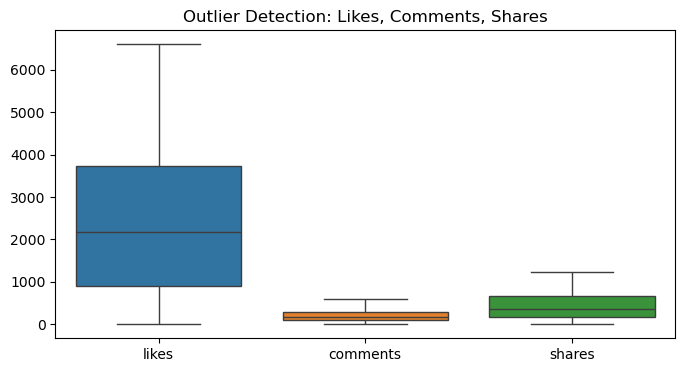

In [14]:
#Outlier Detection
Out = ["likes", "comments", "shares"]
plt.figure(figsize=(8, 4))
sns.boxplot(data=df[Out])
plt.title("Outlier Detection: Likes, Comments, Shares")
plt.show()


In [15]:
#Train_test_split
df["total_engagement"] = df["likes"] + df["comments"] + df["shares"]
x=df.drop(["likes", "comments", "shares","total_engagement","post_id","post_time"],axis=1)
y=df["total_engagement"]

#Feature Scaling 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
scale=StandardScaler()
X_train_scaled=scale.fit_transform(X_train)
X_test_scaled=scale.transform(X_test)


In [16]:
#Model fitting .
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet

lr=LinearRegression()
lr.fit(X_train_scaled,y_train)
print('LinearRegression_Train',lr.score(X_train_scaled,y_train))
print('LinearRegression_Test',lr.score(X_test_scaled,y_test))

models={"DecisionTreeRegressor":DecisionTreeRegressor(max_depth=10, min_samples_leaf=20, random_state=42),
        "RandomForestRegressor": RandomForestRegressor( n_estimators=200,max_depth=15,random_state=42),
       "Elastic":ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)}

for name,value in models.items():
    value.fit(X_train,y_train)
    print(name,"Train",value.score(X_train,y_train))
    print(name,"Test",value.score(X_test,y_test))

LinearRegression_Train 0.3501112757484742
LinearRegression_Test 0.3560111191720219
DecisionTreeRegressor Train 0.9135296699366221
DecisionTreeRegressor Test 0.9101540008481271
RandomForestRegressor Train 0.9330850309646661
RandomForestRegressor Test 0.9257654526406077
Elastic Train 0.34005628668589394
Elastic Test 0.3479216026140832


In [20]:
#as from the above score I concluded to use RandomForestRegressor for this model 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

rf = RandomForestRegressor(
    n_estimators=100,
     min_samples_split=3,
    min_samples_leaf=10,
    max_depth=15,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)


MAE: 382.97071197832304
RMSE: 482.3062493398155
R2: 0.9256996312088128


In [18]:
#df["total_engagement"] = df["likes"] + df["comments"] + df["shares"]
#df["total_engagement"].mean()
#382 / 3011 ≈ 0.127
#“With an average engagement of ~3011, my model’s 
#MAE of ~382 corresponds to ~12.7% error, which is acceptable for noisy social media data. 
#The model generalizes well as shown by R² ≈ 0.93.”)

In [19]:
#
#GridSearch this will automatically check with the best feature value 
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 200],'max_depth': [10, 15, 20],'min_samples_leaf': [1, 5, 10]}
grid = GridSearchCV(rf,param_grid,cv=5,scoring='r2',n_jobs=-1)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)


Best Parameters: {'max_depth': 15, 'min_samples_leaf': 10, 'n_estimators': 100}


In [23]:
best_rf = grid.best_estimator_

y_pred = best_rf.predict(X_test)

print("Final R2:", r2_score(y_test, y_pred))



Final R2: 0.9256996312088128


In [24]:
#this is to know which feature contributed to the model’s predictions. 
import pandas as pd

importance = best_rf.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

feature_importance_df


,Feature,Importance
3,hour,0.298206
6,platform_Twitter,0.256100
0,post_day,0.078558
10,post_type_video,0.077552
1,sentiment_score,0.074283
4,day_of_week,0.065979
8,post_type_poll,0.062054
5,platform_Instagram,0.035419
7,post_type_image,0.028782
9,post_type_text,0.021271
